In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [4]:
import deepmatcher as dm
from utils.intermediate_layer_extraction import return_layer_input
from utils.ri_calculator import computeRi
from utils.distance_measures import nearestNeighborsOnAttribute
import pandas as pd
import torch

In [26]:
DATASET_DIR = '../../datasets/Structured/itunes-amazon/'
augmented_test = pd.read_csv(DATASET_DIR+'augmented_test.csv')

In [27]:
augmented_test[augmented_test.label==0].to_csv(DATASET_DIR+'augmentedtest_negatives.csv',index=False)

## Retrain model 1

In [5]:
attributes = ['Song_Name','Artist_Name','Album_Name','Genre','Price','CopyRight','Time','Released']

In [9]:
hybrid_model = dm.MatchingModel(attr_summarizer='hybrid')
hybrid_model.load_state('../../itunesamazon_impr.pth')
hybrid_model = hybrid_model.to('cuda')

In [30]:
testneg = return_layer_input(hybrid_model,hybrid_model.classifier,
                             '../../datasets/Structured/itunes-amazon/','augmentedtest_negatives',
                            ignore_columns=['id','label','ltable_id','rtable_id'])


Reading and processing data from "../../datasets/Structured/itunes-amazon/augmentedtest_negatives.csv"
0% [############################# ] 100% | ETA: 00:00:00

In [31]:
testpos = return_layer_input(hybrid_model,hybrid_model.classifier,
                               '../../datasets/Structured/itunes-amazon/','test_positives')


Reading and processing data from "../../datasets/Structured/itunes-amazon/test_positives.csv"
0% [########################### ] 100% | ETA: 00:00:00

In [32]:
negatives_ri,neg_rinorms_df= computeRi(hybrid_model.classifier,
                                                    attributes,testneg,0)

100%|██████████| 105/105 [00:25<00:00,  4.08it/s]


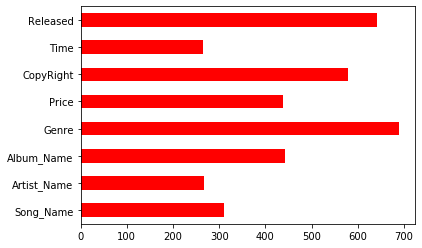

In [33]:
neg_rinorms_df.sum().plot.barh(color='red')

In [17]:
pos_ri_hybrid,pos_rinorms_df = computeRi(hybrid_model.classifier,attributes,
                                              testpos,1)

100%|██████████| 27/27 [00:06<00:00,  4.04it/s]


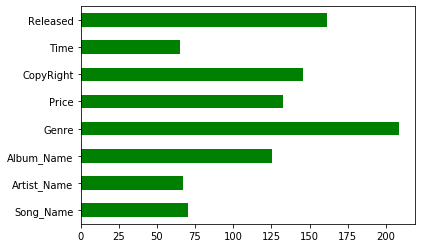

In [18]:
pos_rinorms_df.sum().plot.barh(color='green')

## Retrained model 2

In [16]:
improved2 = dm.MatchingModel(attr_summarizer='hybrid')
improved2.load_state('../../itunesamazon_impr2.pth')
improved2 = improved2.to('cuda')

In [19]:
testneg2 = return_layer_input(improved2,improved2.classifier,
                             '../../datasets/Structured/itunes-amazon/','augmentedtest_negatives',
                             ignore_columns)


Reading and processing data from "../../datasets/Structured/itunes-amazon/test_negatives.csv"
0% [############################# ] 100% | ETA: 00:00:00

In [20]:
testpos2 = return_layer_input(improved2,improved2.classifier,
                               '../../datasets/Structured/itunes-amazon/','test_positives')


Reading and processing data from "../../datasets/Structured/itunes-amazon/test_positives.csv"
0% [########################### ] 100% | ETA: 00:00:00

In [21]:
negatives_ri2,neg_rinorms_df2 = computeRi(improved2.classifier,
                                                    attributes,testneg2,0)

100%|██████████| 82/82 [00:30<00:00,  2.68it/s]


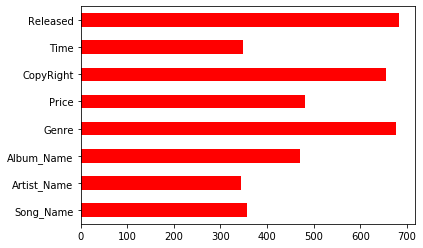

In [22]:
neg_rinorms_df2.sum().plot.barh(color='red')

In [23]:
pos_ri_hybrid2,pos_rinorms_df2 = computeRi(improved2.classifier,attributes,
                                              testpos2,1)

100%|██████████| 27/27 [00:06<00:00,  4.16it/s]


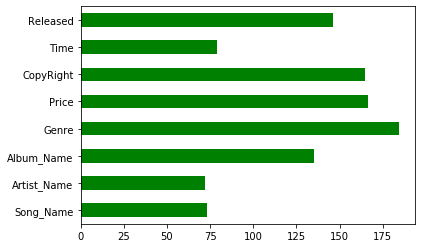

In [24]:
pos_rinorms_df2.sum().plot.barh(color='green')